In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
dog_path = '/home/arjun/Desktop/Datasets/CATvsDOG/train/dogs'

dog_list = []
for filename in os.listdir(dog_path):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')): 
        img = cv2.imread(os.path.join(dog_path, filename))
        if img is not None:
            dog_list.append(img)
print(len(dog_list))

278


In [3]:
cat_path = '/home/arjun/Desktop/Datasets/CATvsDOG/train/cats'

cat_list = []
for filename in os.listdir(cat_path):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        img = cv2.imread(os.path.join(cat_path, filename))
        if img is not None:
            cat_list.append(img)
print(len(cat_list))

279


In [4]:
dog_list[1].shape , cat_list[3].shape

((200, 133, 3), (997, 2000, 3))

In [5]:
cat = []
dog = []

for i in dog_list:
    dog.append(cv2.resize(i,(32,32)))
for j in cat_list:
    cat.append(cv2.resize(j,(32,32)))

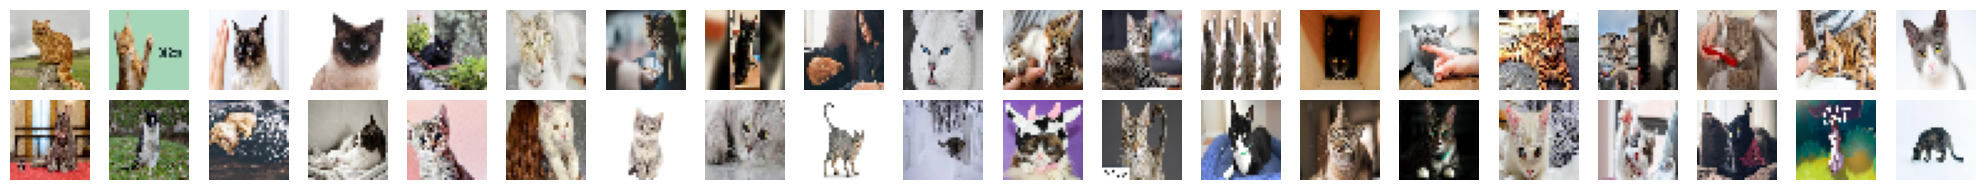

In [6]:
plt.figure(figsize=(20, 2))
rows = 2
cols = 20
for i in range(1, rows * cols + 1):
    plt.subplot(rows, cols, i)
    image = cv2.cvtColor(cat[i], cv2.COLOR_RGB2BGR)
    plt.imshow(image) 
    plt.axis('off')
plt.tight_layout()

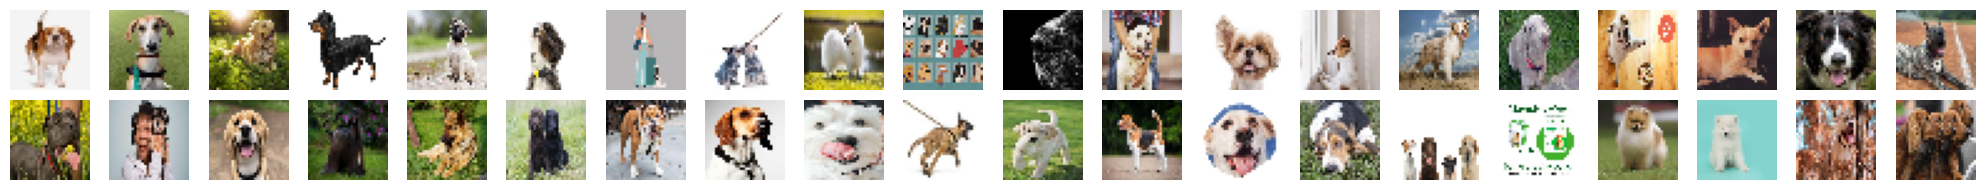

In [7]:
plt.figure(figsize=(20, 2))
rows = 2
cols = 20
for i in range(1, rows * cols + 1):
    plt.subplot(rows, cols, i)
    image = cv2.cvtColor(dog[i], cv2.COLOR_RGB2BGR)
    plt.imshow(image) 
    plt.axis('off')
plt.tight_layout()

In [12]:
cat = [c.flatten() for c in cat]
dog = [d.flatten() for d in dog]
cat[1].shape, dog[1].shape

((3072,), (3072,))

# Creating the Neural Network

Input(1, 32x32x3) -> Linear+ReLU(1, 64) -> Linear(1,64) -> Sigmoid(0 or 1)

![Screenshot from 2023-10-16 12-06-15.png](<attachment:Screenshot from 2023-10-16 12-06-15.png>)
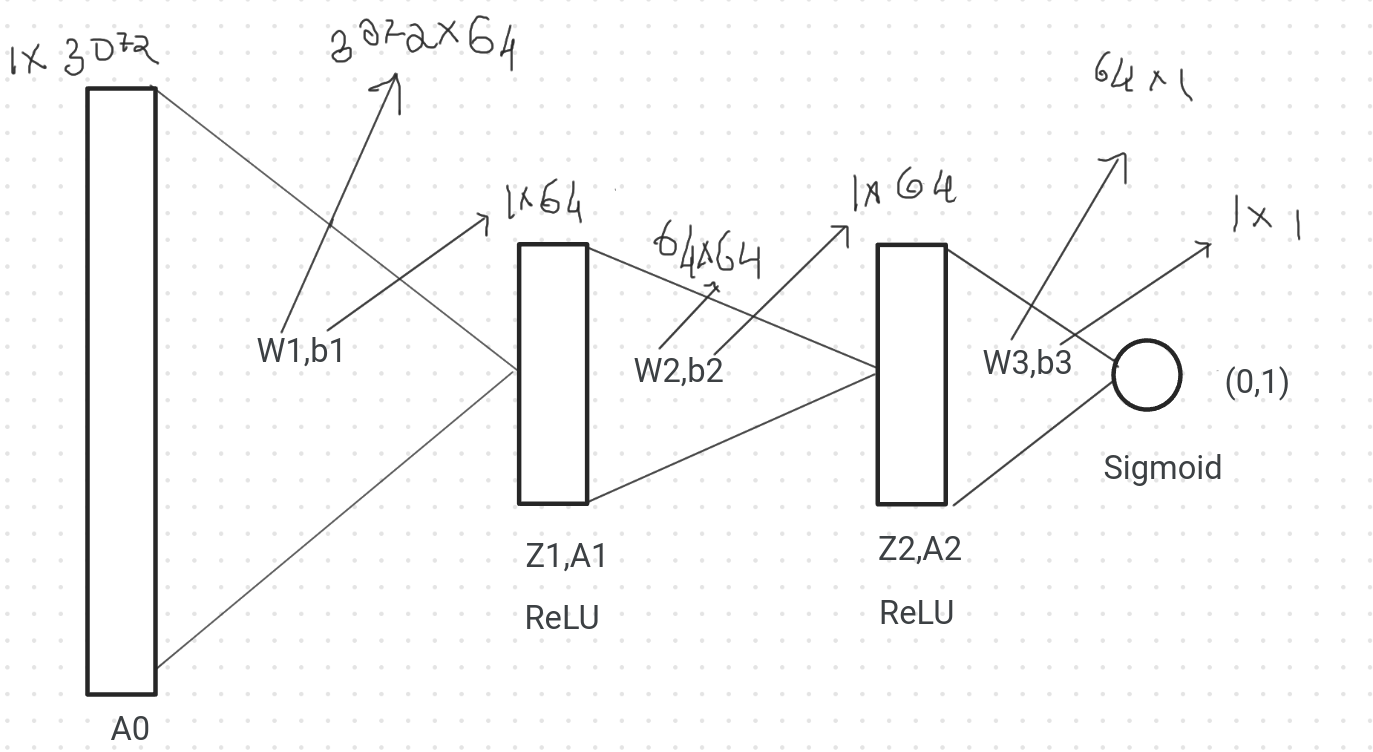

In [90]:
class NN:
    def __init__(self):
        self.W1 = np.random.rand(3072,64)
        self.W2 = np.random.rand(64,64)
        self.W3 = np.random.rand(64,1)
        self.b1 = np.zeros(64)
        self.b2 = np.zeros(64)
        self.b3 = np.zeros(1)
        
    def forward(self, X):  # X is A0
        cache = []
        Z1 = X@self.W1 + self.b1
        A1 = np.maximum(Z1,0)
        
        Z2 = A1@self.W2 + self.b2
        A2 = np.maximum(Z2,0)
        
        Z3 = A2@self.W3 + self.b3
        A3 = self.sigmoid(Z3)
        cache.append(Z1)
        cache.append(Z2)
        cache.append(Z3)
        
        return A3.item(), cache
    
    def backward(self, X, y):
        h = 1e-6  # where h is infinisimally small
        y_pred, cache = self.forward(X)
        Z1,Z2,Z3 = cache
        L = -y*np.log(y_pred+h) - (1-y)*np.log(1-y_pred+h)
        dL_dypred = (-y/(y_pred+h)) - (1-y)/(1-y_pred+h)
        dypred_dZ3 = -np.exp(-Z3)/(1+np.exp(-Z3))**2
        print(dypred_dZ3)
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
        

In [93]:
nn = NN()
X = np.random.rand(1,3072)
nn.forward(X)[1]
X

array([[0.01164403, 0.1288119 , 0.66592617, ..., 0.87008342, 0.39211346,
        0.92836454]])

In [94]:
nn.backward(X,0)

[[-0.]]
